# Cleaning Instagram Text Data

## Importing necessary libraries

In [ ]:
!pip install contractions

In [ ]:
!pip install nltk
!pip install spacy

In [ ]:
!pip install textblob

In [ ]:
#Importing the library

import pandas as pd
import string
import re
import contractions
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Reading the datset into a dataframe
insta_df = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/instagram.csv")

In [ ]:
# Displaying the data
insta_df.head()

,text,label
0,Cool nail but I dont bite on mine (created at:...,non-cyberbullying
1,@offthis_ way to be a asshole (created at:2012...,cyberbullying
2,They are ugly (created at:2013-01-09 15:35:17),cyberbullying
3,T,non-cyberbullying
4,Wooow (created at:2013-02-13 21:56:42),non-cyberbullying


## Data Cleaning/Pre-processing

In [ ]:
#Lower Casing the Data
insta_df['clean_text'] = insta_df.text.str.lower()

In [ ]:
#  remove the specific substring "(created at:-- ::)
# Remove the specific substring from the 'clean_text' column
# Remove the specific substring from the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].str.replace(r'\(created at:.*\)', '', regex=True)


In [ ]:
# Removing @ mentions
# Define a function to remove '@' mentions
def remove_mentions(text):
    return re.sub(r'@\w+', '', text)

# Apply the function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: remove_mentions(x))

In [ ]:
# remove non printable ASCII charcters

def clean_text(text):
    # Remove non-printable characters and weird characters
    cleaned_text = ''.join(filter(lambda x: x in string.printable, text))

    # Remove any other specific weird characters using regex
    cleaned_text = re.sub(r'[^\x00-\x7F]+', '', cleaned_text)

    # Remove extra whitespaces
    cleaned_text = " ".join(cleaned_text.split())

    return cleaned_text

# Apply the function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: clean_text(x))


In [ ]:
# Define a function to calculate the number of words in the text
def count_words(text):
    return len(text.split())

# Create a new column 'clean_text' to store the word count
insta_df['word_count'] = insta_df['clean_text'].apply(lambda x: count_words(x))

# Sort the DataFrame in descending order by 'word_count'
insta_df = insta_df.sort_values(by='word_count', ascending=False)

In [ ]:
# Removing data where the text length is below 10 chars
# Define a function to calculate the word count for each row
def count_words(text):
    return len(text.split())

# Apply the function to calculate word count and filter rows where count is below 10
insta_df = insta_df[insta_df['clean_text'].apply(lambda x: count_words(x)) >= 5]

In [ ]:
# Removing Punctuations
# Define a function to remove punctuation
def remove_punctuation(text):
    return re.sub(f"[{re.escape(string.punctuation)}]", "", text)

# Apply the function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: remove_punctuation(x))


In [ ]:
# Removing Numbers
# Define a function to remove digits from a text
def remove_digits(text):
    return ''.join([i for i in text if not i.isdigit()])

# Apply the function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: remove_digits(x))


In [ ]:
# Removing Extra Space
# Define a function to remove extra spaces and join the words with a single space
def remove_space(text):
    return " ".join(text.split())

# Apply the function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: remove_space(x))


In [ ]:
# Replacing the Repetitions of Punctuations
# Define a function to apply the regex-based substitution
def replace_repetition(text):
    return re.sub(r'(!|.)1+', '', text)

# Apply the function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: replace_repetition(x))


In [ ]:
# Removing Emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

# Apply the remove_emoji function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: remove_emoji(x))


In [ ]:
# Remove emoticons
# Dictionary of emoticons and their descriptions
EMOTICONS = {
    u":‑)": u"Happy face or smiley",
    u":)": u"Happy face or smiley",
    u":-]": u"Happy face or smiley",
    u":]": u"Happy face or smiley",
    u":-3": u"Happy face smiley",
    u":3": u"Happy face smiley",
    u":->": u"Happy face smiley",
    u":>": u"Happy face smiley",
    u"8-)": u"Happy face smiley",
    u":o)": u"Happy face smiley",
    u":-}": u"Happy face smiley",
    u":}": u"Happy face smiley",
    u":-)": u"Happy face smiley",
    u":c)": u"Happy face smiley",
    u":^)": u"Happy face smiley",
    u"=]": u"Happy face smiley",
}

# Generate a regex pattern for the emoticons
emoticon_pattern = re.compile(u'(' + u'|'.join(re.escape(k) for k in EMOTICONS) + u')')

# Define a function to remove emoticons
def remove_emoticons(text):
    return emoticon_pattern.sub('', text)

# Apply the function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: remove_emoticons(x))


In [ ]:
# Removing Contractions
# Define a function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: expand_contractions(x))


In [ ]:
insta_df

,text,label,clean_text,word_count
9442,I was 12 in Orlando visiting my big sister(24)...,non-cyberbullying,i was in orlando visiting my big sister becaus...,268
5915,@cdiaz37 actually I knew almost every on my ig...,cyberbullying,actually i knew almost every on my ig beforeha...,263
6307,Religion and Science are not at odds my friend...,non-cyberbullying,religion and science are not at odds my friend...,226
3579,Became a diagnosed celiac after 7years of misd...,non-cyberbullying,became a diagnosed celiac after years of misdi...,221
3569,I read about it and it made perfect sense. I r...,non-cyberbullying,i read about it and it made perfect sense i re...,220
...,...,...,...,...
5189,Check my clothes out doe! @killinit_streetwear...,non-cyberbullying,check my clothes out doe,5
8192,@chriannarehab hit a nerve there huh? (created...,non-cyberbullying,hit a nerve there huh,5
2389,He looks like a turtle.. (created at:2012-08-0...,non-cyberbullying,he looks like a turtle,5
699,What is Jimmy's friends name? (created at:2012...,non-cyberbullying,what is jimmys friends name,5


In [ ]:
# Spellcheck
from textblob import TextBlob

# Function to perform spell check on a text
def spell_check(text):
    blob = TextBlob(text)
    corrected_text = blob.correct()
    return str(corrected_text)

# Apply the function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: spell_check(x))

<ipython-input-143-cbc1224d61d8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: spell_check(x))


In [ ]:
insta_df

,text,label,clean_text,word_count
9442,I was 12 in Orlando visiting my big sister(24)...,non-cyberbullying,i was in orlando visiting my big sister becaus...,268
5915,@cdiaz37 actually I knew almost every on my ig...,cyberbullying,actually i knew almost every on my in beforeha...,263
6307,Religion and Science are not at odds my friend...,non-cyberbullying,religion and science are not at odds my friend...,226
3579,Became a diagnosed celiac after 7years of misd...,non-cyberbullying,became a diagnosed coeliac after years of misd...,221
3569,I read about it and it made perfect sense. I r...,non-cyberbullying,i read about it and it made perfect sense i re...,220
...,...,...,...,...
5189,Check my clothes out doe! @killinit_streetwear...,non-cyberbullying,check my clothes out doe,5
8192,@chriannarehab hit a nerve there huh? (created...,non-cyberbullying,hit a nerve there hut,5
2389,He looks like a turtle.. (created at:2012-08-0...,non-cyberbullying,he looks like a turtle,5
699,What is Jimmy's friends name? (created at:2012...,non-cyberbullying,what is jimmy friends name,5


In [ ]:
# Removing Stop Words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'clean_text' column
insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: remove_stopwords(x))

In [ ]:
# Apply Tokenisation
nltk.download('punkt')
from nltk.tokenize import  sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def text_to_tokens(text):
  tokens = []
  for sentence in sent_tokenize(text):
    for word in word_tokenize(sentence):
      tokens.append(word)
  return tokens

insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: text_to_tokens(x))

In [ ]:
# Apply lemmatisation
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

def apply_lemmatisation(tokens):
  keep = []
  lemmatizer = WordNetLemmatizer()
  for token in tokens:
    keep.append(lemmatizer.lemmatize(token))
  return keep

insta_df['clean_text'] = insta_df['clean_text'].apply(lambda x: apply_lemmatisation(x))



In [ ]:
insta_df

,text,label,clean_text,word_count
9442,I was 12 in Orlando visiting my big sister(24)...,non-cyberbullying,"[orlando, visiting, big, sister, pregnant, wen...",268
5915,@cdiaz37 actually I knew almost every on my ig...,cyberbullying,"[actually, knew, almost, every, beforehand, n,...",263
6307,Religion and Science are not at odds my friend...,non-cyberbullying,"[religion, science, odds, friend, would, think...",226
3579,Became a diagnosed celiac after 7years of misd...,non-cyberbullying,"[became, diagnosed, coeliac, year, misdiagnosi...",221
3569,I read about it and it made perfect sense. I r...,non-cyberbullying,"[read, made, perfect, sense, read, seriously, ...",220
...,...,...,...,...
5189,Check my clothes out doe! @killinit_streetwear...,non-cyberbullying,"[check, clothes, doe]",5
8192,@chriannarehab hit a nerve there huh? (created...,non-cyberbullying,"[hit, nerve, hut]",5
2389,He looks like a turtle.. (created at:2012-08-0...,non-cyberbullying,"[look, like, turtle]",5
699,What is Jimmy's friends name? (created at:2012...,non-cyberbullying,"[jimmy, friend, name]",5


In [ ]:
# Function to join lemmatized tokens back into sentences
def join_tokens(tokens):
    return ' '.join(tokens)

# Apply the join_tokens function to the 'cleaned_text' column
insta_df['joined_text'] = insta_df['clean_text'].apply(join_tokens)

# Display the DataFrame with the joined sentences
insta_df

<ipython-input-151-a6729bc7e032>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insta_df['joined_text'] = insta_df['clean_text'].apply(join_tokens)


,text,label,clean_text,word_count,joined_text
9442,I was 12 in Orlando visiting my big sister(24)...,non-cyberbullying,"[orlando, visiting, big, sister, pregnant, wen...",268,orlando visiting big sister pregnant went dad ...
5915,@cdiaz37 actually I knew almost every on my ig...,cyberbullying,"[actually, knew, almost, every, beforehand, n,...",263,actually knew almost every beforehand n know g...
6307,Religion and Science are not at odds my friend...,non-cyberbullying,"[religion, science, odds, friend, would, think...",226,religion science odds friend would think diffe...
3579,Became a diagnosed celiac after 7years of misd...,non-cyberbullying,"[became, diagnosed, coeliac, year, misdiagnosi...",221,became diagnosed coeliac year misdiagnosing he...
3569,I read about it and it made perfect sense. I r...,non-cyberbullying,"[read, made, perfect, sense, read, seriously, ...",220,read made perfect sense read seriously hundred...
...,...,...,...,...,...
5189,Check my clothes out doe! @killinit_streetwear...,non-cyberbullying,"[check, clothes, doe]",5,check clothes doe
8192,@chriannarehab hit a nerve there huh? (created...,non-cyberbullying,"[hit, nerve, hut]",5,hit nerve hut
2389,He looks like a turtle.. (created at:2012-08-0...,non-cyberbullying,"[look, like, turtle]",5,look like turtle
699,What is Jimmy's friends name? (created at:2012...,non-cyberbullying,"[jimmy, friend, name]",5,jimmy friend name


In [ ]:
final_insta_df = insta_df[['joined_text', 'label']]

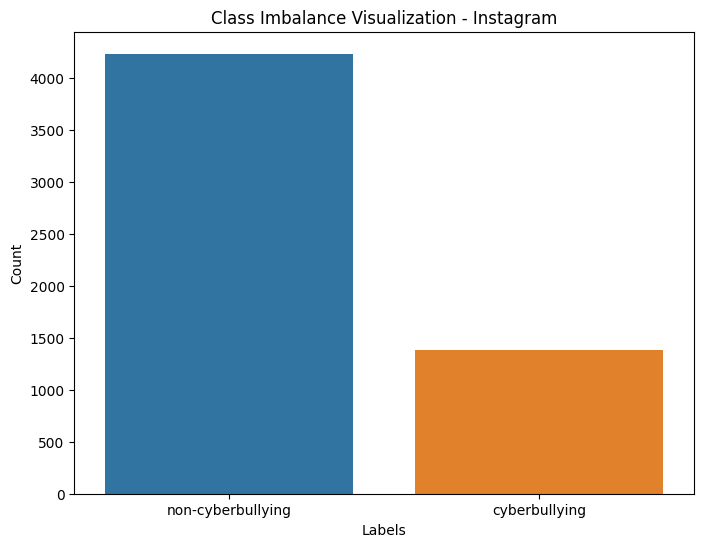

In [ ]:
class_counts = final_insta_df.label.value_counts()

# Lets create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Class Imbalance Visualization - Instagram')
plt.show()


In [ ]:
final_insta_df.to_csv('clean_insta.csv', index=False)

In [ ]:
# Reading the datset into a dataframe
insta2_df = pd.read_csv("/content/drive/MyDrive/MSC Data science/Thesis/Final data/instagram.csv")

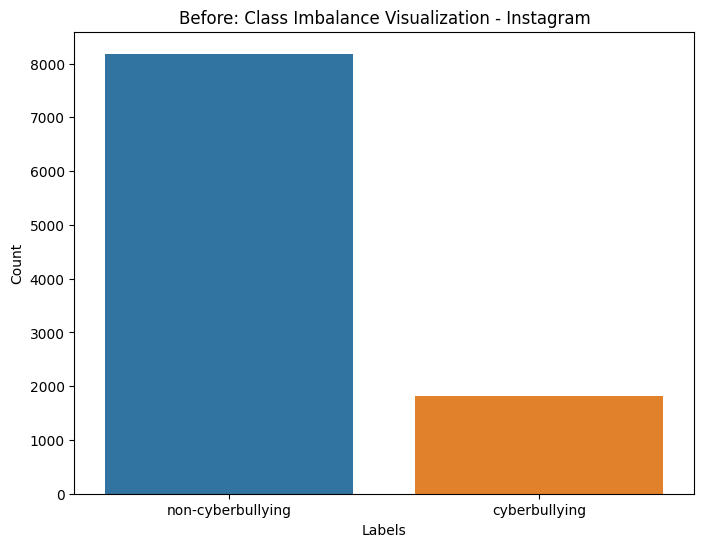

In [ ]:
class_counts = insta2_df.label.value_counts()

# Lets create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Before: Class Imbalance Visualization - Instagram')
plt.show()